# Zadanie 1
## Zestaw 7 zadanie komputerowe 1
Zadanie komputerowe 1. Załóż, że dysponujesz generatorem liczb losowych U z rozkładem
równomiernym na (0, 1). Używając tego rozkładu zaprojektuj algorytm realizujący generator liczb
losowych z rozkładem:
#### a) Bernoulliego z parametrem p
#### b) Dwumianowy z parametrami n, p

#### a)

In [161]:
from scipy.stats import uniform
def bernoulli(p, s):
    return [1 if i <= p else 0 for i in uniform.rvs(loc=0, scale=1, size=s)]
# Aby wylosować s elementów o rozkładzie bernoulliego z prawdopodobieństwem p
# Dla pojedynczej liczby losowana jest wartość z przedziału (0,1)
# Za sukces przyjmowane jest wylosowanie wartości <= p

bernoulli(0.25, 4)

[0, 0, 1, 0]

#### b)

In [162]:
import numpy as np
from scipy.stats import uniform
def dwumianowy(n, p, s):
    return [np.sum(uniform.rvs(loc=0, scale=1, size=n) <= p) for _ in range(s)]

# Aby wylosować s elementów o rozkładzie dwumianowym z prawdopodobieństwem p przy n próbach
# dla pojedyczej liczby lososane jest n liczb z rozkładu równomiernego (0,1)
# sumujemy liczbę zwycięstw gdzie za zwycięstwo uzanwane jest wylosowanie wartości <= p


dwumianowy(9, 0.3, 4)

[3, 4, 2, 3]

# Zadanie 2
## Zestaw 4 zadanie 12
 Napisz program, który będzie obliczał skumulowaną funkcję rozkładu dla
zmiennej o rozkładzie dwumianowym, tzn. wartość
#### $$𝑃\{𝑋 ≤ 𝑖\} = \sum_{k=0}^i\binom{n}{k}p^k(1-p)^{n-k} \; dla\; i=0,1,...,n \\ $$
W tym celu oblicz i wykorzystaj zależność pomiędzy 𝑃{𝑋 = 𝑘 + 1} a 𝑃{𝑋 = 𝑘}, tzn. użyj tej
zależności rekurencyjnej do obliczania kolejnych 𝑃{𝑋 = 𝑖}.

In [163]:
from scipy.special import binom
def dwumianowy_skumulowany(i, n, p):
    if i == 0:
        return pow(1 - p, n)
    else:
        return binom(n, i) * pow(p, i) * pow(1 - p, n - i) + dwumianowy_skumulowany(i - 1, n, p)
# Aby policzyć skumulowaną funkcję rozkładu zmiennej wywołujemy rekurencyjnie funkcję
# korzystamy z własności P{X<=i} = P{X<i}+P{X=i}
# n jest to stała oznaczająca liczbę prób, p jest to prawdopodobieństwo zwycięstwa dla pojedynczej próby

#Można tę funkcję zamienić na iteracyjną, otrzymamy tą samą złożoność

dwumianowy_skumulowany(3, 8, 0.3)

0.8058956499999996

# Zadanie 3
## Zestaw 4 zadanie 13
Napisz program analogiczny do tego z zadania 1, ale dla rozkładu
Poissona. Oblicz w analogiczny sposób zależność między
#### 𝑃{𝑋 = 𝑖 + 1} a 𝑃{𝑋 = 𝑖}
i wykorzystaj zależność rekurencyjną.

In [164]:
from math import exp, factorial
def poisson_skumulowany(i, l):
    if i == -1:
        return 0
    else:
        return (pow(l, i) * exp(-l)) / factorial(i) + poisson_skumulowany(i - 1, l)
# Aby policzyć skumulowaną funkcję rozkładu zmiennej wywołujemy rekurencyjnie funkcję
# korzystamy z własności P{X<=i} = P{X<i}+P{X=i}
# l jest to stała oznaczająca oczekiwaną liczbę zdarzeń w danym przedziale czasu,
# a i jest to wartość oznaczającą liczbę wystąpień zdarzenia

#Można tę funkcję zamienić na iteracyjną, otrzymamy tą samą złożoność
poisson_skumulowany(4, 2)

0.9473469826562889

# Zadanie 4
### Zestaw 10 zadanie 6
Dostawca usług internetowych bada obciążenie sieci. Liczba jednoczesnych
użytkowników w 50 lokalizacjach wynosi (w tysiącach):

17.2, 22.1, 18.5, 17.2, 18.6, 14.8, 21.7, 15.8, 16.3, 22.8, 24.1, 13.3, 16.2, 17.5, 19.0, 23.9, 14.8, 22.2,
21.7, 20.7, 13.5, 15.8, 13.1, 16.1, 21.9, 23.9, 19.3, 12.0, 19.9, 19.4, 15.4, 16.7, 19.5, 16.2, 16.9, 17.1,
20.2, 13.4, 19.8, 17.7, 19.7, 18.7, 17.6, 15.9, 15.2, 17.1, 15.0, 18.8, 21.6, 11.9.

a) Oblicz średnią, wariancję i odchylenie z próby.

b) Oszacuj błąd standardowy średniej z próby.

c) Oblicz pięciopunktowe podsumowanie i skonstruuj wykres-pudełko (polecenia summary,
boxplot w R).

d) Oblicz rozstęp międzykwartylowy; czy w próbie są jakieś wartości odstające?

e) Zaraportowano, że liczba jednoczesnych użytkowników podlega rozkładowi normalnemu; czy
histogram wspiera to stwierdzenie?

In [165]:
import numpy as np

X = np.array(
    [17.2, 22.1, 18.5, 17.2, 18.6, 14.8, 21.7, 15.8, 16.3, 22.8, 24.1, 13.3, 16.2, 17.5, 19.0, 23.9, 14.8, 22.2,
     21.7, 20.7, 13.5, 15.8, 13.1, 16.1, 21.9, 23.9, 19.3, 12.0, 19.9, 19.4, 15.4, 16.7, 19.5, 16.2, 16.9, 17.1,
     20.2, 13.4, 19.8, 17.7, 19.7, 18.7, 17.6, 15.9, 15.2, 17.1, 15.0, 18.8, 21.6, 11.9])

#### a)

In [166]:
print("średnia: ", X.mean())
print('wariancja: ', X.var())
print("odchylenie: ", X.std())

średnia:  17.954
wariancja:  9.768884
odchylenie:  3.1255213965033097


#### b)

In [167]:
from scipy.stats import sem
print("błąd średniej próby: ", sem(X))

błąd średniej próby:  0.44650305664332995


#### c)

Pięciopunktowe podsumowanie:
11.9
24.1
3.1255213965033097
17.954
17.55


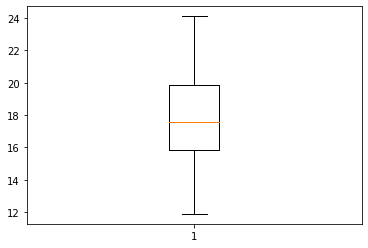

In [168]:
import numpy as np
import matplotlib.pyplot as plt
print("Pięciopunktowe podsumowanie:")
print(np.min(X))
print(np.max(X))
print(np.std(X))
print(np.mean(X))
print(np.median(X))
plt.boxplot(X)
plt.show()

#### d)

In [169]:
import numpy as np
q3, q1 = np.percentile(X, [75, 25])
iqr = q3 - q1
print(iqr)

4.049999999999999


#### e)

Histogram nie wspiera tego stwierdzenia


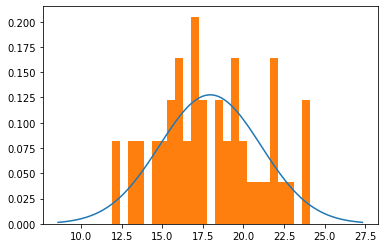

In [170]:
#Rysuję histogram gęstości
# i wykres gęstości rozkładu normalnego o średniej i odchyleniu standardowym wyliczonym dla zbioru X
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  norm
print("Histogram nie wspiera tego stwierdzenia")
b = int(X.size / 2)
mu = X.mean()
sigma = X.std()
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.hist(X, bins=b, density=True)
plt.show()

# Zadanie 5
### Zestaw 10 zadanie 8
Poniższy zbiór danych reprezentuje liczbę nowych kont komputerowych
założonych przez administratora w ciągu 10 kolejnych dni:

43, 37, 50, 51, 58, 105, 52, 45, 45, 10.

a) Oblicz średnią, medianę, kwartyle i odchylenie standardowe.

b) Sprawdź istnienie wartości odstających używając reguły 1.5 𝐼𝑄𝑅.

c) Usuń wykryte wartości odstające i ponownie oblicz statystyki z punktu a).

d) Przedyskutuj wpływ efektu wartości odstających na statystyki opisowe.

In [171]:
import numpy as np
X = np.array([43, 37, 50, 51, 58, 105, 52, 45, 45, 10])

#### a)

In [172]:
import numpy as np
def param(X):
    print("średnia: ", np.mean(X))
    print("mediana: ", np.median(X))
    print("odchylenie standardowe: ", np.std(X))
    q = np.quantile(X, [0.25, 0.5, 0.75])
    print("kwartyle: ", q)
param(X)

średnia:  49.6
mediana:  47.5
odchylenie standardowe:  22.27195545972558
kwartyle:  [43.5  47.5  51.75]


#### b)

In [173]:
import numpy as np
# wyliczam wartości które wystają poza przedział [Q1 - 1.5 * IQR , Q3 + 1,5*IQR]
# gdzie IQR = Q3 - Q1
print("Tak, są to:")
def wartosci_odsatjace(X):
    q3, q1 = np.percentile(X, [75, 25])
    iqr = q3 - q1
    q = np.quantile(X, [0.25, 0.5, 0.75])
    return [i for i in X if (i < + q[0] - 1.5 * iqr or i > 1.5 * iqr + q[2])]
print(wartosci_odsatjace(X))

Tak, są to:
[105, 10]


#### c)

In [174]:
import numpy as np
# Usuwam wartości odstające i wyliczam parametry wedle podpunktu a)
X1 = X[~np.in1d(X, wartosci_odsatjace(X))]
print(X1)
param(X1)

[43 37 50 51 58 52 45 45]
średnia:  47.625
mediana:  47.5
odchylenie standardowe:  6.040229714174784
kwartyle:  [44.5  47.5  51.25]


#### d)
Średnia, odchylenie standardowe i kwartyle 1 i 3 są wrażliwe na wartości odstające, w przeciwieństwie do mediany(jako kwartyl 2)

# Zadanie 6
Zestaw 8 zadanie komputerowe

Napisz program, który będzie ilustrował Centralne Twierdzenie Graniczne
poprzez symulację rozkładu sumy 𝑛 zmiennych losowych, z których każda przyjmuj wartość 0, 1, 2, 3
lub 4.

Program na wejściu dostaje 𝑛 oraz rozkład zmiennych $X_i , 𝑖 = 1, … , 𝑛 $

tzn. wartości 𝑝(0), ...,𝑝(4), a na wyjściu rysuje wykres rozkładu prawdopodobieństwa zmiennej
$\\ Y = \sum_{i=1}^n X_i\\ $
(np. poprzez symulację 1000 generacji zmiennej 𝑌).

Wykonaj eksperymenty dla 𝑛 = 5, 10, 25, 100 i dla dowolnego
rozkładu (np. 𝑝(0) = 0.25, 𝑝(1) = 0.15, 𝑝(2) = 0.1, 𝑝(3) = 0.2, 𝑝(4) = 0.3). Zaobserwuj, jak rozkład
zbliża się do normalnego wraz ze wzrostem 𝑛.

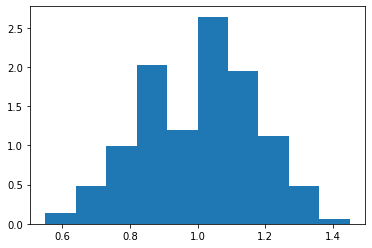

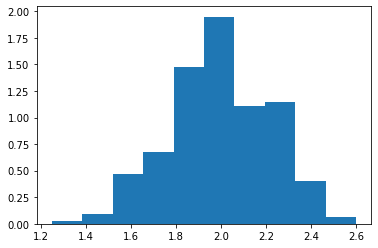

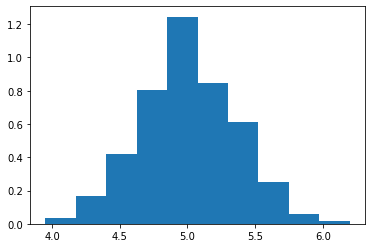

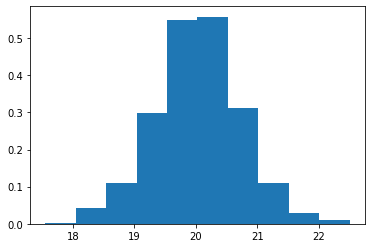

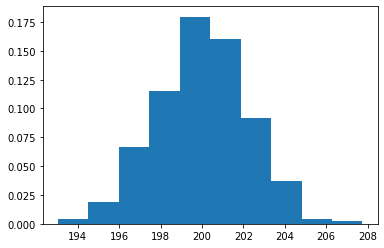

In [176]:
import random
import matplotlib.pyplot as plt
import numpy as np
# Dla każdej z wartości n z listy N dokonuję 1000 losowań
# Losuję po n wartości ze zbioru 5 prawdopodobieństw, a ich sumę dodaję do listy
# Otrzymane 1000 wyników wizualizuję na histogramie
# Otrzymując wykresy coraz bardziej zbliżone do rozkładu normalnego
N = [5, 10, 25, 100,1000]
P = [0.25,0.15,0.1,0.2,0.3]

def CTG_symulacja(n, probabilities):
    l=[]
    for k in range(1000):
        l.append(sum(random.choices(probabilities,k=n)))
    plt.hist(l,density=True)
    plt.show()
for n in N:
    CTG_symulacja(n,P)